## How to Plot Time Complexity

1. Generate a list of test-case inputs that will be given to your Algo. This is the most important part for building a strong intuition about your run-time. The size of the inputs needs to be very large, and have a good breadth of edge-case considerations to achieve maximum understanding of your algorithms performance.
2. Generate a list of random ints, ranging between 0 and the total number of test-case inputs you've generated from #1.
3. Within the loop that generates random ints (Step 2), pluck out a random input (Step 1), and feed it to your Algo.
4. Adjacent to Step 3, we'll bind the algo to a `time.time()` call that will track the runtime of the algo as `result_time`.
5. Append the `result_time` value to a list of `times[]` that will be fed into our final plot.
6. Build the plot; assigning y-axis as the `times` value, and x-axis as the size of the input

In [20]:
# Step 1
import random
test_cases = []
for i in range(0, 100):
    test_cases.append([random.randint(0,1000) for i in range(random.randint(0,10000))])

Now we need to collect all the times taken for each input.
To do this, we'll iterate through our test_cases and sort each one accordingly. FYI: it could take a while, based on the particular sorting algorithm you're using.

In [21]:
import time
from algorithms.sort import quick_sort

input_size = []
times = []
for tc in test_cases:
    start_time = time.time()
    input_size.append(len(tc))
    result = quick_sort(tc)
    total_time = time.time() - start_time
    times.append(total_time)

Let's plot the results!

1. Import `plt` from `matplotlib.pyplot`
2. Assign X and Y labels

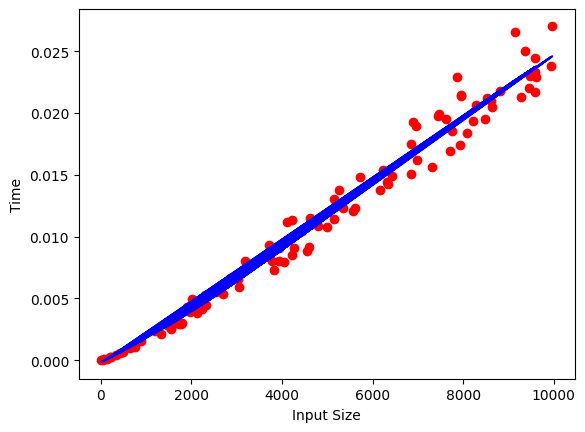

In [92]:
import numpy as np


import matplotlib.pyplot as plot
%matplotlib inline
plot.xlabel('Input Size')
plot.ylabel('Time')

p = np.poly1d(np.polyfit(input_size, times, 5))
plot.plot(input_size, times, 'or')
plot.plot(input_size, [p(n) for n in input_size], '-b')

If you're so inclined to make fancier plots with zooming, mouse-over's, and download/export you can run plotly's graphing

In [23]:
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objects as go
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()


fig = go.Figure()
for i in range(0, len(times)):
    fig.add_trace(go.Scatter(x=input_size, y=times, mode='markers'))
fig.update_traces(marker={'color': 'blue'})
fig.show()

In Conclusion, to attach this workflow to any algorithm you've written, you could just import the `graph_complexity` module into your current module as such 

In [ ]:
import graph_complexity as graph

def 